1. Dimension reduction using Principle Component Analysis(PCA):

In [1]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('merged_datasets.csv')
print("\nCleaned Data:")
print(f"Initial shape: {df.shape}")
df


Cleaned Data:
Initial shape: (65006, 10)


,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
0,1,4,1,10,40,0,4.075543,1.000000,1.662912,1
1,1,4,1,10,40,0,4.152007,1.000000,1.724866,1
2,1,4,1,10,40,0,4.228906,1.000000,1.788139,1
3,1,4,1,10,40,0,4.302100,1.000000,1.845245,1
4,1,4,1,10,40,0,4.376877,1.000000,1.904128,1
...,...,...,...,...,...,...,...,...,...,...
65001,448,4,4,10,60,44,8.953783,8.783813,1.096171,0
65002,448,4,4,10,60,44,8.968729,8.798245,0.870647,0
65003,448,4,4,10,60,44,8.984867,8.813831,0.639024,0
65004,448,4,4,10,60,44,9.001328,8.829726,0.398100,0


1a. Splitting the Data into Training and Test Sets

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate predictors (X) and target (y)
X = df[['HUMAN PLAYER POSITION (X) metres',
               'HUMAN PLAYER POSITION (Y) metres',
               'INITITAL VELOCITY OF SHUTTELCOCK(m/s)',
               'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
               'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)']]

y = df[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
          'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
          'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

shot_id = df[['SHOT_ID']]
out_of_court_shots = df[['OUT_OF_COURT_SHOTS']]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Also split the shot_id and out_of_court_shots using the same random_state for correct mapping
shot_id_train, shot_id_test = train_test_split(shot_id, test_size=0.3, random_state=42)
out_of_court_shots_train, out_of_court_shots_test = train_test_split(out_of_court_shots, test_size=0.3, random_state=42)

Training set shape: (45504, 5), (45504, 3)
Test set shape: (19502, 5), (19502, 3)


1b. Standardizing the Training Set Data

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


1c. Apply PCA to the standardized training set

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA object
components = None
pca = PCA(n_components = components)

# Fit PCA to the training set
pca.fit(X_train_scaled)

print("Variance explained by all the principal components =", sum(pca.explained_variance_ratio_ * 100))

Variance explained by all the principal components = 100.0


In [5]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[4.06675236e+01 3.69327805e+01 2.23996959e+01 4.13363032e-33
 0.00000000e+00]


In [6]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Cumulative Variances (Percentage):
[ 40.66752357  77.60030408 100.         100.         100.        ]


Text(0, 0.5, 'Explained variance (%)')

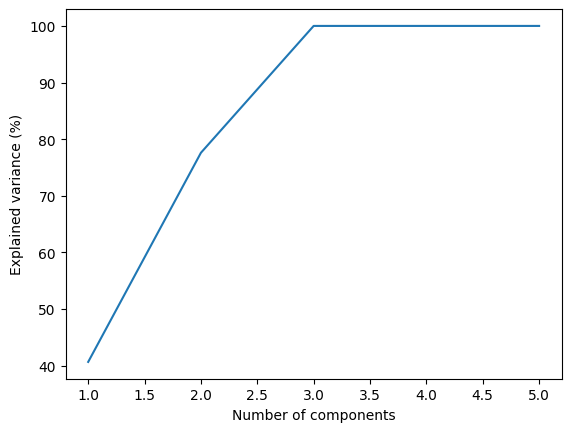

In [7]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative explained variance (%):
[ 40.66752357  77.60030408 100.        ]
The PCA algorithm found 3 principal components to preserve 95% of the variability in the data.


Text(0, 0.5, 'Explained variance (%)')

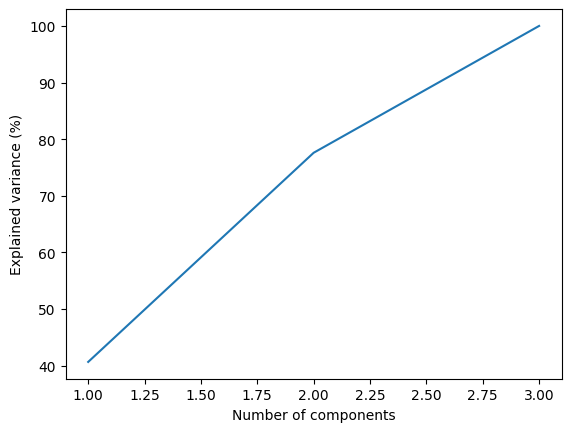

In [8]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=3)

# Fit PCA to the training set
pca.fit(X_train_scaled)

print("Cumulative explained variance (%):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f"The PCA algorithm found {components} principal components to preserve 95% of the variability in the data.")

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
           

In [9]:
# Exclude 'SHOT_ID' column from PCA analysis
pca_components = abs(pca.components_)[:, 1:]

# Print top 5 most important features in each component
print('Top 5 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # Get the indices of the top 5 values in each row
    indices = np.argsort(-pca_components[row])[:5]
    
    # Print the top 5 feature names
    print(f'Component {row}: {df.columns[indices + 1].to_list()}')

print('======================================================================================================================')
# Exclude 'SHOT_ID' column from PCA analysis
pca_components = abs(pca.components_)[:, 1:]

# Print importance values of all features in each component
print('Importance values of all features in each component')
print('==================================================')
for row in range(pca_components.shape[0]):
    # Get the importance values of all features in each row
    importance_values = pca_components[row]
    
    # Create a dictionary mapping feature names to importance values
    feature_importance = {feature: importance for feature, importance in zip(df.columns[1:], importance_values)}
    
    # Print all feature names and their importance values in the component
    print(f'Component {row}:')
    for feature, importance in feature_importance.items():
        print(f'{feature}: {importance}')


Top 5 most important features in each component
Component 0: ['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres']
Component 1: ['HUMAN PLAYER POSITION (X) metres', 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'HUMAN PLAYER POSITION (Y) metres']
Component 2: ['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres']
Importance values of all features in each component
Component 0:
HUMAN PLAYER POSITION (X) metres: 0.23199805610841304
HUMAN PLAYER POSITION (Y) metres: 0.0
INITITAL VELOCITY OF SHUTTELCOCK(m/s): 0.6101859019820264
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE): 0.7575289215497311
Component 1:
HUMAN PLAYER POSITION (X) metres: 0.827449517995961
HUMAN PLAYER POSITION (Y) metres: 1.1102230246251565e-16
INITITAL VELOCITY OF SHUTTELCOCK(m/s)

In [10]:
# Transform both the training set and the test set using the trained PCA object
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Training set shape: {X_train_pca.shape}")
print(X_train_pca)
print(f"Test set shape: {X_test_pca.shape}")
print(X_test_pca)

Training set shape: (45504, 3)
[[ 0.55455072 -1.57197306 -0.06210476]
 [ 0.22624186 -0.78511505  0.31204062]
 [ 1.90058248  1.30570957 -0.51519454]
 ...
 [ 1.68747351  2.06578883 -0.04545544]
 [-1.17917512  0.9626629   0.43897223]
 [-1.32895662 -0.42360184 -0.97847455]]
Test set shape: (19502, 3)
[[-0.94877534  0.90910539  0.63015966]
 [-0.8911754   0.89571601  0.67795652]
 [-1.67455629 -0.34326558 -1.2652557 ]
 ...
 [-0.19424855 -1.39791115 -0.68346391]
 [ 0.55455072 -1.57197306 -0.06210476]
 [ 0.47393245 -0.13215081  1.16415458]]


In [11]:
# Create a DataFrame from the PCA result
df_pca_train = pd.DataFrame(data = X_train_pca, columns = [f"PC{i+1}" for i in range(X_train_pca.shape[1])])
df_pca_train = pd.concat([df_pca_train, y_train.reset_index(drop=True), shot_id_train.reset_index(drop=True), out_of_court_shots_train.reset_index(drop=True)], axis=1)

df_pca_test = pd.DataFrame(data = X_test_pca, columns = [f"PC{i+1}" for i in range(X_test_pca.shape[1])])
df_pca_test = pd.concat([df_pca_test, y_test.reset_index(drop=True), shot_id_test.reset_index(drop=True), out_of_court_shots_test.reset_index(drop=True)], axis=1)

# Reorder the columns to move SHOT_ID to the left-most column
cols = df_pca_train.columns.tolist()
cols = cols[-2:-1] + cols[:-2] + cols[-1:]
df_pca_train = df_pca_train[cols]
df_pca_test = df_pca_test[cols]

print(f"The size of the df_pca_train including the label column is: {df_pca_train.shape}")
print(f"The size of the df_pca_test including the label column is: {df_pca_test.shape}")

The size of the df_pca_train including the label column is: (45504, 8)
The size of the df_pca_test including the label column is: (19502, 8)


In [12]:
# Save the PCA result to a CSV file
df_pca_train.to_csv("pca_95_badmintondata_train.csv", index=False)
df_pca_test.to_csv("pca_95_badmintondata_test.csv", index=False)

print("PCA results saved to 'pca_95_badmintondata_train.csv' and 'pca_95_badmintondata_test.csv'")

PCA results saved to 'pca_95_badmintondata_train.csv' and 'pca_95_badmintondata_test.csv'
